In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
diamonds = pd.read_csv('diamonds.csv')

In [2]:
def outliers(var):
    a = []
    q1 = diamonds[var].quantile(.25)
    q2 = diamonds[var].quantile(.5)
    q3 = diamonds[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in diamonds[var]:
        if i > ulim:
            i = np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in diamonds.select_dtypes(exclude='object').columns:
    diamonds[col] = outliers(col)

In [3]:
for i in diamonds.select_dtypes(exclude='object').columns:
    diamonds[i] = diamonds[i].fillna(diamonds[i].mean())

In [4]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,Ideal,E,SI2,61.500000,55.000000,326.0,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.800000,61.000000,326.0,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,61.776373,57.373404,327.0,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.400000,58.000000,334.0,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.300000,58.000000,335.0,4.34,4.35,2.75,51.917250


In [5]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])
diamonds.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,2,1,3,61.500000,55.000000,326.0,3.95,3.98,2.43,38.202030
1,2,0.21,3,1,2,59.800000,61.000000,326.0,3.89,3.84,2.31,34.505856
2,3,0.23,1,1,4,61.776373,57.373404,327.0,4.05,4.07,2.31,38.076885
3,4,0.29,3,5,5,62.400000,58.000000,334.0,4.20,4.23,2.63,46.724580
4,5,0.31,1,6,3,63.300000,58.000000,335.0,4.34,4.35,2.75,51.917250


In [6]:
df1 = pd.DataFrame(diamonds,columns= ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'volume'])

X = df1
y = diamonds['price']

In [7]:
class BayesianRegression:
    
    def fit(self, X, y, sigma_squared, tau, add_intercept = True):
        
        # record info
        if add_intercept:
            ones = np.ones(len(X)).reshape((len(X),1))
            X = np.append(ones, np.array(X), axis = 1)
        self.X = X
        self.y = y
        
        # fit
        XtX = np.dot(X.T, X)/sigma_squared
        I = np.eye(X.shape[1])/tau
        inverse = np.linalg.inv(XtX + I)
        Xty = np.dot(X.T, y)/sigma_squared
        self.beta_hats = np.dot(inverse , Xty)
        
        # fitted values
        self.y_hat = np.dot(X, self.beta_hats)

In [8]:
sigma_squared = 11.8
tau = 10
model = BayesianRegression()
model.fit(X, y, sigma_squared, tau)

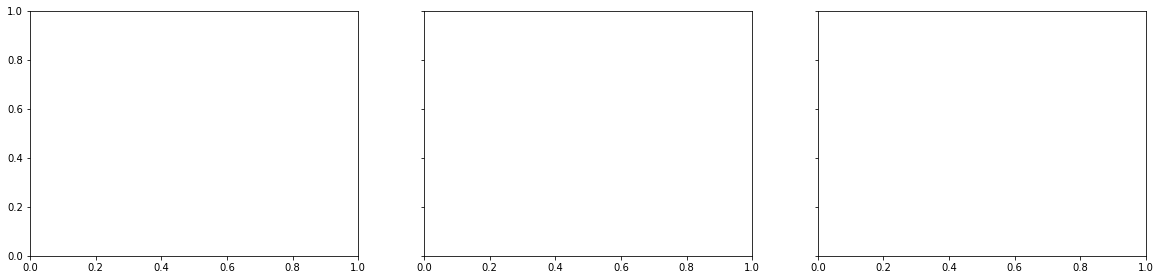

In [9]:
Xs = ['X'+str(i + 1) for i in range(X.shape[1])]
taus = [100, 10, 1]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols = len(taus), figsize = (20, 4.5), sharey = True)